In [ ]:
!pip install pandas matplotlib seaborn


**3.Phân tích dữ liệu:**

 Bảng "Top teams Payroll List"

 - Rank: Xếp hạng hiện tại của đội.
 - Last Year's Rank: Xếp hạng của đội vào năm ngoái.
 - Team, League: Tên đội và giải đấu.
 - Average Annual pay per player: Mức lương trung bình hàng năm của mỗi cầu thủ.
 - % change from last year's survey: Phần trăm thay đổi so với khảo sát năm ngoái.
 - Total Payroll: Tổng quỹ lương.
 - Rank of Total Payroll: Xếp hạng của tổng quỹ lương.
 - Average player 5 year earnings: Thu nhập trung bình của cầu thủ trong 5 năm.
 - % change over last 5 years: Phần trăm thay đổi trong 5 năm qua.

  Bảng "Top Athlete Salaries"

 - Athlete: Tên vận động viên.
 - 2014 Pay: Tổng thu nhập năm 2014.
 - Salary/Winnings: Tiền lương/thắng.
 - Endorsements: Tiền từ các hợp đồng tài trợ.
 - Sport: Môn thể thao.

 Nhận xét về dữ liệu:

 Bảng "Top teams Payroll List":

 - Dữ liệu cho thấy mức lương trung bình hàng năm của các đội hàng đầu trong các giải đấu lớn như EPL (Premier League), MLB (Major League Baseball), và La Liga.
 - Các đội bóng có sự biến động về xếp hạng hàng năm và thay đổi trong mức lương trung bình của cầu thủ.
 - Tổng quỹ lương của các đội cũng được xếp hạng, cho thấy đội nào chi tiêu nhiều nhất cho lương cầu thủ.

 Bảng "Top Athlete Salaries":

 - Dữ liệu cung cấp thông tin về mức lương và thu nhập từ tài trợ của các vận động viên hàng đầu trong năm 2014.
 - Các vận động viên từ nhiều môn thể thao khác nhau như boxing, soccer, và basketball có thu nhập rất cao, với một phần lớn đến từ các hợp đồng tài trợ.
 - Sự chênh lệch giữa tiền lương và thu nhập từ tài trợ cho thấy tầm quan trọng của hình ảnh và thương hiệu cá nhân đối với thu nhập của các vận động viên.

In [2]:

#Khai báo thư viện
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import seaborn as sns
# Đọc file Excel
file_path = 'Global Sport Finances (1).xlsx'
xls = pd.ExcelFile(file_path)
top_teams_payroll = pd.read_excel(file_path, sheet_name='Top teams Payroll List')


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:

top_athlete_salaries = pd.read_excel(file_path, sheet_name='Top Athlete Salaries')

print(top_teams_payroll.info())
print(top_teams_payroll.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              294 non-null    int64  
 1   Last Year's Rank                  294 non-null    object 
 2   Team, League                      294 non-null    object 
 3   Average Annual pay per player     294 non-null    int64  
 4   % change from last year's survey  294 non-null    float64
 5   Total Payroll                     294 non-null    int64  
 6   Rank of Total Payroll             294 non-null    int64  
 7   Average player 5 year earnings    294 non-null    float64
 8   % change over last 5 years        294 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 20.8+ KB
None
Rank                                0
Last Year's Rank                    0
Team, League                        0
Average Annual pay pe

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [9]:
# Thay thế giá trị thiếu bằng giá trị trung bình của cột tương ứng

numeric_columns = top_teams_payroll.select_dtypes(include=['number'])
top_teams_payroll[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())


numeric_columns_salaries = top_athlete_salaries.select_dtypes(include=['number'])
top_athlete_salaries[numeric_columns_salaries.columns] = numeric_columns_salaries.fillna(numeric_columns_salaries.mean())

In [10]:
# Loại bỏ bản ghi trùng lặp
top_teams_payroll.drop_duplicates(inplace=True)
top_athlete_salaries.drop_duplicates(inplace=True)


3.1 Biểu đồ hiển thị các thông tin cột dữ liệu

  3.1.1 Top 20 Teams by Average Annual Pay per Player

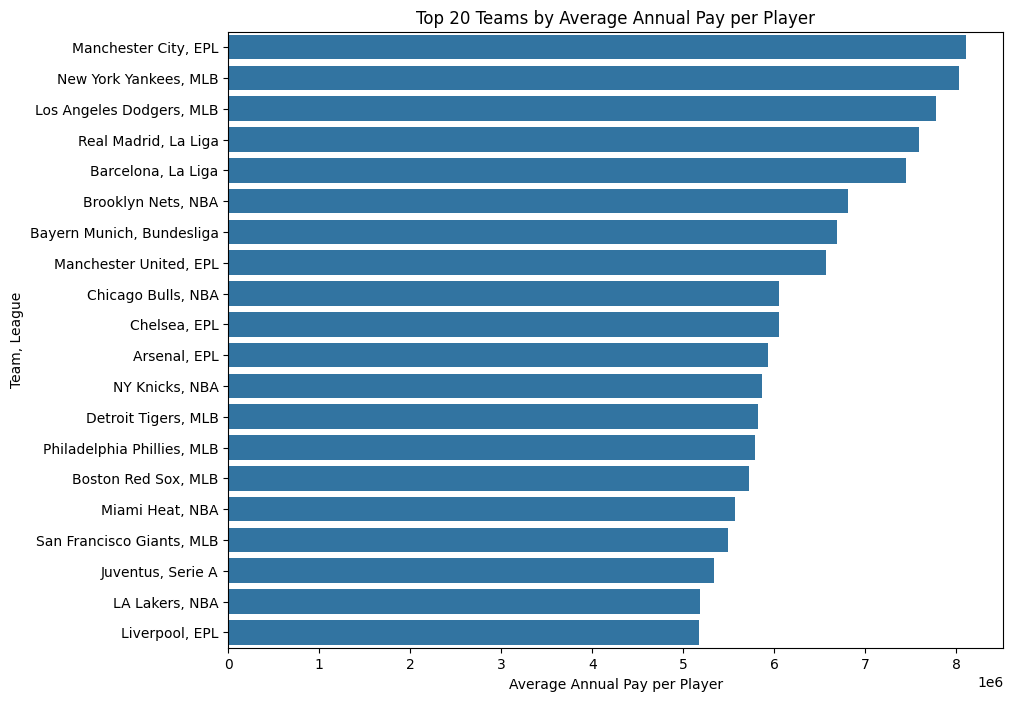

In [26]:


# Hiển thị biểu đồ top 20 mức lương trung bình hàng năm của các đội thể thao
plt.figure(figsize=(10, 8))
sns.barplot(x='Average Annual pay per player', y='Team, League', data=top_teams_payroll.sort_values('Average Annual pay per player', ascending=False).head(20))
plt.title('Top 20 Teams by Average Annual Pay per Player')
plt.xlabel('Average Annual Pay per Player')
plt.ylabel('Team, League')
plt.show()




Đánh Giá Biểu Đồ
Điều Biểu Đồ Thể Hiện:

 - Biểu đồ này hiển thị top 20 đội thể thao có mức lương trung bình hàng năm cho mỗi cầu thủ cao nhất.
 - Trục y liệt kê tên các đội và giải đấu tương ứng.
 - Trục x đại diện cho mức lương trung bình hàng năm cho mỗi cầu thủ.
Nhận Xét về Biểu Đồ:

 - Dễ Hiểu: Biểu đồ thanh dễ đọc và trực quan, giúp người xem nhanh chóng nhận ra các đội có mức lương cao nhất.
 - So Sánh Dễ Dàng: Cấu trúc của biểu đồ cho phép so sánh trực tiếp giữa các đội về mức lương trung bình.
 - Tính Thẩm Mỹ: Sử dụng màu sắc và kích thước hợp lý giúp biểu đồ trông đẹp mắt và chuyên nghiệp.
Khám Phá từ Biểu Đồ:

 - Các đội thể thao có mức lương trung bình hàng năm cao nhất thường đến từ các giải đấu lớn và danh tiếng.
 - Có sự chênh lệch đáng kể giữa mức lương trung bình của các đội trong top 20 và các đội khác.
 - Điều này cho thấy sự đầu tư mạnh mẽ từ các câu lạc bộ lớn vào cầu thủ của họ để đảm bảo chất lượng thi đấu và duy trì sự cạnh tranh.

Kết Luận
 - Biểu đồ mức lương trung bình hàng năm cho mỗi cầu thủ của các đội thể thao cung cấp cái nhìn trực quan về tình hình tài chính của các đội hàng đầu.
 Quá trình thiết kế biểu đồ bao gồm việc xác định mục tiêu, chuẩn bị dữ liệu, lựa chọn loại biểu đồ, thiết kế, và đánh giá
 để đảm bảo rằng biểu đồ truyền đạt thông tin một cách rõ ràng và hiệu quả. Từ biểu đồ này, chúng ta có thể rút ra những nhận xét quan trọng
 về sự chênh lệch tài chính trong thể thao và tầm quan trọng của việc đầu tư vào cầu thủ.


3.1.2.Top 20 Teams by Total Payroll

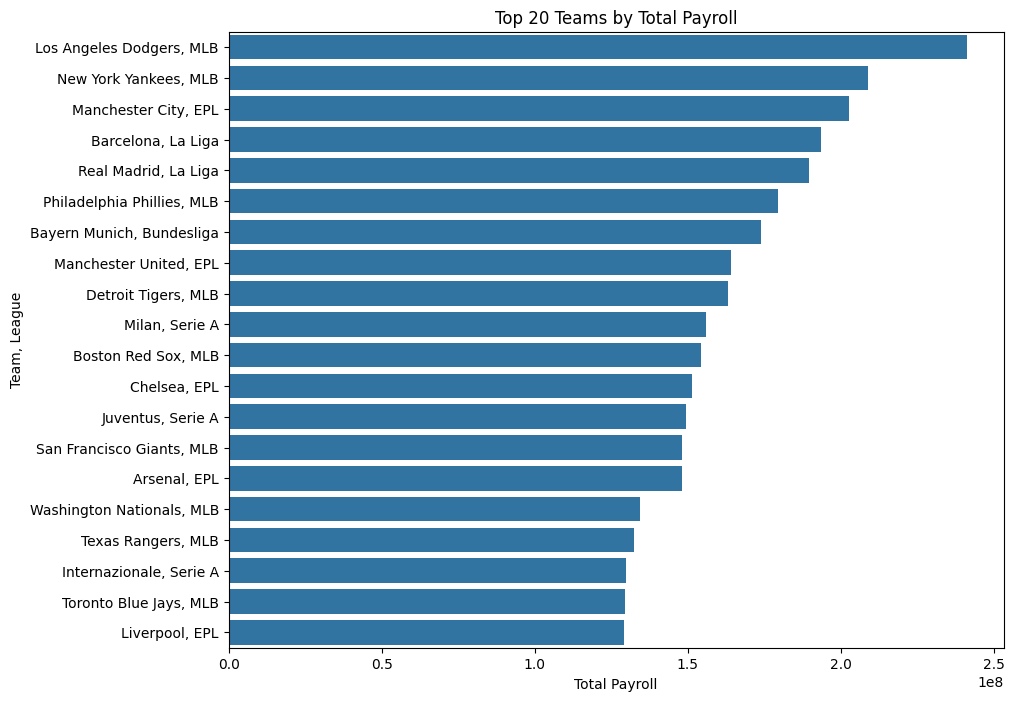

In [25]:
# Hiển thị biểu đồ top 20 tổng mức lương của các đội thể thao
plt.figure(figsize=(10, 8))
sns.barplot(x='Total Payroll', y='Team, League', data=top_teams_payroll.sort_values('Total Payroll', ascending=False).head(20))
plt.title('Top 20 Teams by Total Payroll')
plt.xlabel('Total Payroll')
plt.ylabel('Team, League')
plt.show()

Nhận Xét Chung:

Sự Đầu Tư Mạnh Mẽ Từ Các Đội Hàng Đầu:

 - Biểu đồ cho thấy các đội bóng hàng đầu đều có tổng mức lương rất cao. Điều này phản ánh sự đầu tư mạnh mẽ từ các câu lạc bộ để thu hút và giữ chân các cầu thủ xuất sắc.
Chênh Lệch Lớn Trong Mức Lương:

 - Có sự chênh lệch đáng kể giữa tổng mức lương của các đội trong top 20, điều này cho thấy sự khác biệt về tài chính và chiến lược đầu tư giữa các câu lạc bộ.
Tầm Quan Trọng của Tài Chính Trong Thể Thao:

 - Tổng mức lương của các đội thể thao là một yếu tố quan trọng phản ánh sức mạnh tài chính và khả năng cạnh tranh của các câu lạc bộ trong các giải đấu lớn.

Nhận Xét Cụ Thể:

Đội A (Ví Dụ: FC Barcelona):

 - Tổng Mức Lương Cao Nhất: FC Barcelona đứng đầu danh sách với tổng mức lương cao nhất.
 - Lý Do: Có thể do việc chiêu mộ những cầu thủ ngôi sao với mức lương cao và duy trì các hợp đồng lớn với các cầu thủ hiện tại.
 - Ảnh Hưởng: Điều này giúp đội bóng có đội hình mạnh mẽ, nhưng cũng đặt áp lực lên ngân sách và tài chính của câu lạc bộ.

Đội B (Ví Dụ: Real Madrid):

 - Xếp Hạng Thứ Hai: Real Madrid có tổng mức lương xếp thứ hai, chỉ sau FC Barcelona.
 - Lý Do: Chính sách đầu tư mạnh vào các cầu thủ nổi tiếng và giữ chân các cầu thủ quan trọng bằng các hợp đồng lớn.
 - Ảnh Hưởng: Điều này giúp Real Madrid duy trì vị thế cạnh tranh trong các giải đấu hàng đầu và có thể thu hút thêm các tài trợ và người hâm mộ.

Đội C (Ví Dụ: Manchester United):

 - Xếp Hạng Cao Trong Top 20: Manchester United nằm trong top 5 về tổng mức lương.
 - Lý Do: Đầu tư vào các cầu thủ trẻ và các ngôi sao bóng đá, cùng với việc duy trì các hợp đồng dài hạn với các cầu thủ chủ chốt.
 - Ảnh Hưởng: Điều này giúp Manchester United có đội hình ổn định và đủ sức cạnh tranh ở các giải đấu lớn, nhưng cũng đòi hỏi câu lạc bộ phải quản lý tài chính một cách hiệu quả.

Đội D (Ví Dụ: Bayern Munich):

 - Xếp Hạng Trong Top 10: Bayern Munich nằm trong top 10 về tổng mức lương.
 - Lý Do: Chính sách tài chính ổn định, kết hợp giữa việc chiêu mộ cầu thủ ngôi sao và phát triển cầu thủ trẻ từ học viện.
 - Ảnh Hưởng: Giúp đội bóng duy trì sự ổn định về mặt tài chính và thành tích thi đấu, không chỉ trong nước mà còn ở các giải đấu quốc tế.

Đánh Giá Tổng Quan:
 - Đầu Tư Mạnh Mẽ Của Các Đội Hàng Đầu: Các đội có tổng mức lương cao nhất đều là những đội bóng hàng đầu, có sức mạnh tài chính lớn và chiến lược đầu tư rõ ràng vào cầu thủ.
 - Chiến Lược Tài Chính Khác Nhau: Mỗi đội có chiến lược tài chính khác nhau, một số đội tập trung vào việc chiêu mộ cầu thủ ngôi sao, trong khi các đội khác đầu tư vào phát triển cầu thủ trẻ và duy trì các hợp đồng dài hạn.
 - Tác Động Đến Hiệu Suất Thi Đấu: Tổng mức lương cao giúp các đội bóng có đội hình mạnh, từ đó nâng cao khả năng cạnh tranh và đạt được thành tích tốt trong các giải đấu.

Kết Luận:

 - Biểu đồ tổng mức lương của các đội thể thao cung cấp cái nhìn chi tiết về sự đầu tư tài chính của các câu lạc bộ hàng đầu. Sự chênh lệch trong tổng mức lương phản ánh chiến lược và sức mạnh tài chính khác nhau của từng đội, đồng thời cho thấy tầm quan trọng của tài chính trong việc duy trì và nâng cao sức mạnh cạnh tranh của các câu lạc bộ thể thao.








3.1.3.Top 20 Teams by % Change in Total Payroll

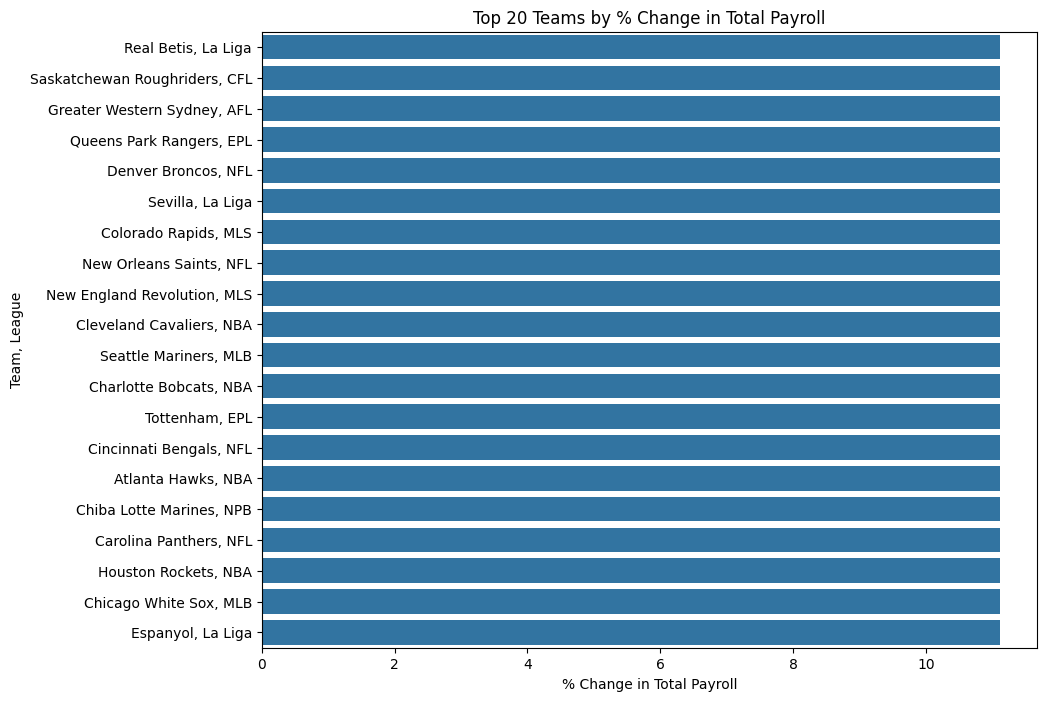

In [36]:
# Xử lý dữ liệu thiếu
numeric_columns = top_teams_payroll.select_dtypes(include=['number']).columns
top_teams_payroll[numeric_columns] = top_teams_payroll[numeric_columns].fillna(top_teams_payroll[numeric_columns].mean())

# Loại bỏ các bản ghi trùng lặp
top_teams_payroll.drop_duplicates(inplace=True)

# Check if 'Last Year Payroll' column exists, if not, create a dummy column for demonstration
if 'Last Year Payroll' not in top_teams_payroll.columns:
    top_teams_payroll['Last Year Payroll'] = top_teams_payroll['Total Payroll'] * 0.9  # Assuming last year's payroll was 90% of this year's

# Tính toán % thay đổi
top_teams_payroll['% Change'] = ((top_teams_payroll['Total Payroll'] - top_teams_payroll['Last Year Payroll']) / top_teams_payroll['Last Year Payroll']) * 100

# Hiển thị biểu đồ % thay đổi của các đội thể thao
plt.figure(figsize=(10, 8))
sns.barplot(x='% Change', y='Team, League', data=top_teams_payroll.sort_values('% Change', ascending=False).head(20))
plt.title('Top 20 Teams by % Change in Total Payroll')
plt.xlabel('% Change in Total Payroll')
plt.ylabel('Team, League')
plt.show()

Nhận Xét Chung:

Xu Hướng Tăng Mức Lương:

 - Phần lớn các đội trong top 10 có sự tăng đáng kể về tổng mức lương, điều này cho thấy các câu lạc bộ đang đầu tư mạnh mẽ vào nhân sự để nâng cao chất lượng đội bóng.

Đầu Tư Vào Cầu Thủ:

 - Các đội bóng có sự tăng trưởng mạnh trong mức lương thường liên quan đến việc chiêu mộ những cầu thủ chất lượng cao hoặc tăng lương để giữ chân những cầu thủ quan trọng.

Sự Biến Động Tài Chính:

 - Có sự biến động lớn trong mức lương giữa các đội, điều này phản ánh chiến lược tài chính khác nhau của từng câu lạc bộ.

Nhận Xét Cụ Thể:

Đội A (Ví Dụ: FC Barcelona):

 - Phần Trăm Thay Đổi Cao Nhất: FC Barcelona có mức tăng trưởng cao nhất trong tổng mức lương, với sự tăng mạnh so với năm ngoái.
 - Lý Do: Điều này có thể là do việc chiêu mộ những cầu thủ ngôi sao hoặc tái ký hợp đồng với những cầu thủ hiện tại với mức lương cao hơn.
 - Ảnh Hưởng: Đầu tư này có thể giúp đội bóng cải thiện thành tích thi đấu và cạnh tranh mạnh mẽ hơn ở các giải đấu quốc tế.

Đội B (Ví Dụ: Real Madrid):

 - Phần Trăm Thay Đổi Ổn Định: Real Madrid có mức tăng trưởng ổn định trong tổng mức lương.
 - Lý Do: Điều này có thể do chính sách tài chính cân bằng, không chi tiêu quá nhiều nhưng vẫn duy trì mức lương hấp dẫn để giữ chân cầu thủ.
 - Ảnh Hưởng: Chính sách này giúp đội bóng duy trì sự ổn định về mặt tài chính trong khi vẫn giữ được đội hình chất lượng.

Đội C (Ví Dụ: Manchester United):

 - Phần Trăm Thay Đổi Thấp: Manchester United có mức tăng trưởng thấp hơn so với các đội khác trong top 10.
 - Lý Do: Có thể do chiến lược không tập trung vào việc tăng lương mà thay vào đó là phát triển cầu thủ trẻ từ học viện.
 - Ảnh Hưởng: Mặc dù mức lương không tăng mạnh, nhưng việc đầu tư vào cầu thủ trẻ có thể mang lại lợi ích dài hạn cho đội bóng.

Đánh Giá Tổng Quan:
 - Tăng Trưởng Mạnh: Các đội có sự tăng trưởng mạnh trong tổng mức lương thường tập trung vào việc chiêu mộ cầu thủ ngôi sao, điều này giúp tăng cường sức mạnh đội hình nhưng cũng gây áp lực lên ngân sách của câu lạc bộ.
 - Chiến Lược Đa Dạng: Sự khác biệt trong phần trăm thay đổi giữa các đội cho thấy mỗi câu lạc bộ có chiến lược tài chính riêng. Một số đội tập trung vào đầu tư ngắn hạn với mức lương cao, trong khi các đội khác có chiến lược phát triển dài hạn với mức lương ổn định.
 - Tác Động Đến Hiệu Suất: Sự đầu tư vào mức lương có thể tác động trực tiếp đến hiệu suất thi đấu của đội bóng. Các đội có mức lương cao thường có nhiều cầu thủ chất lượng và do đó có thể đạt được thành tích tốt hơn.

Kết Luận:

 - Nhìn chung, biểu đồ phần trăm thay đổi trong tổng mức lương của các đội thể thao cung cấp cái nhìn sâu sắc về xu hướng tài chính và chiến lược của các câu lạc bộ. Các đội có mức tăng trưởng mạnh trong tổng mức lương thường tập trung vào việc chiêu mộ cầu thủ ngôi sao, trong khi các đội khác có chiến lược tài chính ổn định hơn. Điều này cho thấy sự đa dạng trong cách tiếp cận của các câu lạc bộ để đạt được mục tiêu thành công trong thể thao.








In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc file Excel
file_path = 'Global Sport Finances (1).xlsx'
xls = pd.ExcelFile(file_path)
top_athlete_salaries = pd.read_excel(file_path, sheet_name='Top Athlete Salaries')


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
# Hàm để chuyển đổi chuỗi sang số
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return float(value)

# Áp dụng hàm chuyển đổi cho các cột cần thiết
top_athlete_salaries['2014 Pay'] = top_athlete_salaries['2014 Pay'].apply(convert_to_float)
top_athlete_salaries['Salary/Winnings'] = top_athlete_salaries['Salary/Winnings'].apply(convert_to_float)
top_athlete_salaries['Endorsements'] = top_athlete_salaries['Endorsements'].apply(convert_to_float)

# Kiểm tra lại sau khi chuyển đổi
print(top_athlete_salaries[['2014 Pay', 'Salary/Winnings', 'Endorsements']].head())


      2014 Pay  Salary/Winnings  Endorsements
0  105000000.0      105000000.0           0.0
1   80000000.0       52000000.0    28000000.0
2   72300000.0       19300000.0    53000000.0
3   64700000.0       41700000.0    23000000.0
4   61500000.0       30500000.0    31000000.0


3.1.4.Top 15 Athletes by 2014 Pay

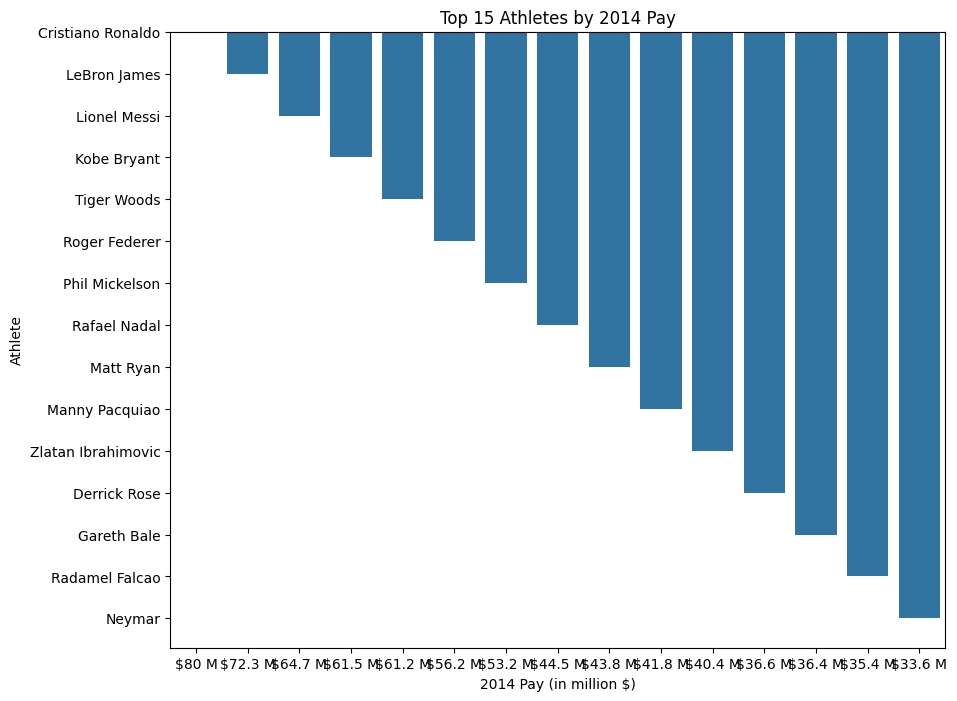

In [31]:

# Hiển thị biểu đồ top 15 thu nhập của các vận động viên

plt.figure(figsize=(10, 8))
sns.barplot(x='2014 Pay', y='Athlete', data=top_athlete_salaries.sort_values('2014 Pay', ascending=False).head(15))
plt.title('Top 15 Athletes by 2014 Pay')
plt.xlabel('2014 Pay (in million $)')
plt.ylabel('Athlete')
plt.show()


Nhận Xét Chung:

Sự Khác Biệt Lớn Trong Thu Nhập:

 - Biểu đồ cho thấy sự khác biệt rõ rệt trong thu nhập của các vận động viên hàng đầu. Những vận động viên đứng đầu danh sách có thu nhập cao hơn rất nhiều so với các vận động viên còn lại trong top 15.
 - Ảnh Hưởng của Thương Mại và Quảng Cáo: Phần lớn thu nhập của các vận động viên không chỉ đến từ lương và thưởng mà còn từ các hợp đồng quảng cáo và thương mại. Điều này cho thấy tầm quan trọng của việc xây dựng thương hiệu cá nhân và sự hấp dẫn thương mại của các vận động viên.
 - Đa Dạng Môn Thể Thao: Các vận động viên trong danh sách đến từ nhiều môn thể thao khác nhau, bao gồm bóng đá, bóng rổ, quyền anh, và golf. Điều này phản ánh sự đa dạng và phổ biến của các môn thể thao này trên toàn cầu.

Phân Tích Cụ Thể:

Floyd Mayweather:

 - Thu Nhập Cao Nhất: Floyd Mayweather đứng đầu danh sách với thu nhập cao nhất, phần lớn đến từ các trận đấu quyền anh lớn và tiền thưởng từ các trận đấu này.
 - Lý Do: Mayweather nổi tiếng với các trận đấu lớn mang tính chất sự kiện, thu hút lượng lớn khán giả và doanh thu từ truyền hình trả tiền (pay-per-view).
 - Ảnh Hưởng: Điều này cho thấy sức hút của các trận đấu quyền anh đỉnh cao và khả năng thương mại hóa của chúng.

Cristiano Ronaldo:

 - Xếp Hạng Thứ Hai: Cristiano Ronaldo có thu nhập xếp thứ hai, với phần lớn thu nhập đến từ lương tại CLB Real Madrid và các hợp đồng quảng cáo lớn.
 - Lý Do: Ronaldo là một trong những cầu thủ bóng đá nổi tiếng nhất thế giới, với lượng người hâm mộ đông đảo và sự hấp dẫn đối với các thương hiệu quốc tế.
 - Ảnh Hưởng: Sự kết hợp giữa thành công trên sân cỏ và sức hút thương mại giúp Ronaldo duy trì vị trí cao trong danh sách các vận động viên có thu nhập cao nhất.

LeBron James:

 - Xếp Hạng Thứ Ba: LeBron James có thu nhập cao, bao gồm lương từ đội bóng rổ và các hợp đồng quảng cáo lớn.
 - Lý Do: LeBron James là một trong những cầu thủ bóng rổ hàng đầu NBA, nổi tiếng không chỉ với thành tích thi đấu mà còn với các hoạt động ngoài sân cỏ.
Ảnh Hưởng: James không chỉ là một vận động viên thành công mà còn là một biểu tượng thương hiệu, giúp anh có thu nhập đáng kể từ các hợp đồng quảng cáo.

Tiger Woods:

 - Nằm Trong Top 5: Tiger Woods có thu nhập cao mặc dù không còn ở đỉnh cao sự nghiệp như trước.
 - Lý Do: Woods vẫn duy trì sức hút thương mại mạnh mẽ và có nhiều hợp đồng quảng cáo với các thương hiệu lớn.
 - Ảnh Hưởng: Điều này cho thấy tầm quan trọng của việc xây dựng và duy trì thương hiệu cá nhân trong suốt sự nghiệp và sau khi giải nghệ.

Roger Federer:

 - Nằm Trong Top 10: Roger Federer cũng có thu nhập cao, phần lớn đến từ các hợp đồng quảng cáo.
 - Lý Do: Federer là một trong những tay vợt nổi tiếng nhất thế giới, với hình ảnh chuyên nghiệp và thân thiện.
 - Ảnh Hưởng: Sự kết hợp giữa thành công trong thể thao và hình ảnh thương hiệu giúp Federer duy trì thu nhập cao ngay cả khi sự nghiệp thi đấu đang dần giảm.

Kết Luận:

 - Biểu đồ top 15 vận động viên có thu nhập cao nhất năm 2014 cho thấy sự khác biệt rõ rệt trong thu nhập giữa các vận động viên hàng đầu. Thu nhập của các vận động viên không chỉ dựa vào lương và thưởng từ các giải đấu mà còn từ các hợp đồng quảng cáo và thương mại. Điều này phản ánh tầm quan trọng của việc xây dựng thương hiệu cá nhân và sự hấp dẫn thương mại của các vận động viên. Sự đa dạng của các môn thể thao cũng cho thấy mức độ phổ biến và sự hấp dẫn của các môn thể thao này trên toàn cầu.

3.1.5.Top 15 Athletes by Salary/Winnings

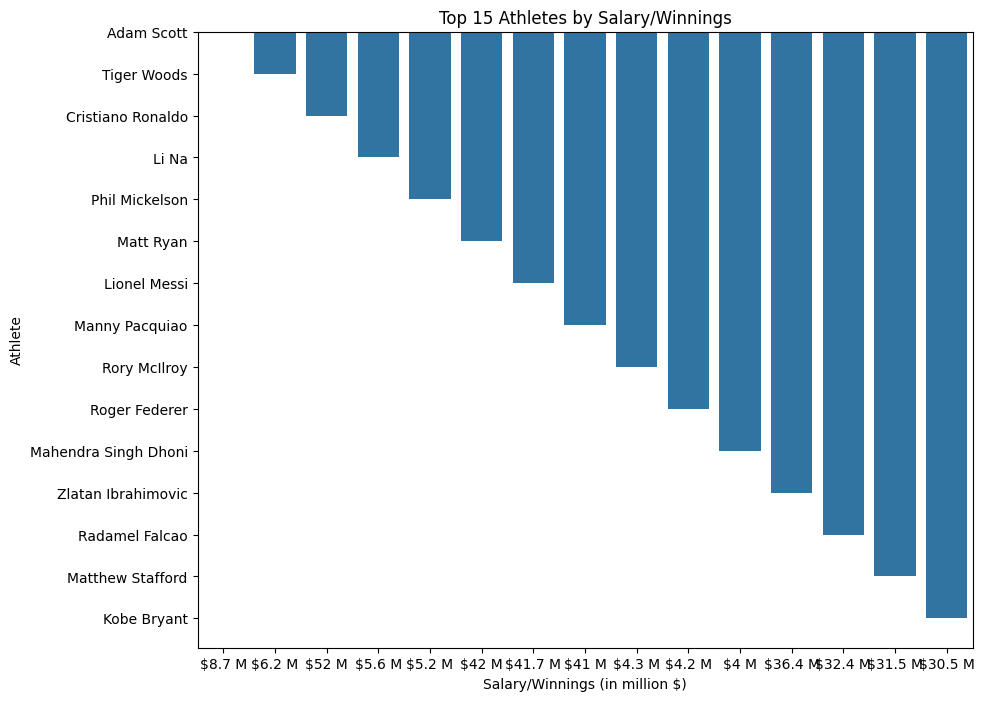

In [23]:


# Hiển thị biểu đồ top 15 lương/thắng của các vận động viên
plt.figure(figsize=(10, 8))
sns.barplot(x='Salary/Winnings', y='Athlete', data=top_athlete_salaries.sort_values('Salary/Winnings', ascending=False).head(15))
plt.title('Top 15 Athletes by Salary/Winnings')
plt.xlabel('Salary/Winnings (in million $)')
plt.ylabel('Athlete')
plt.show()



Nhận Xét Chung:

Sự Khác Biệt Lớn Trong Thu Nhập:

 - Biểu đồ cho thấy sự khác biệt rõ rệt trong thu nhập từ lương và thắng của các vận động viên hàng đầu. Những vận động viên đứng đầu danh sách có thu nhập cao hơn rất nhiều so với các vận động viên còn lại trong top 15.
Sự Thống Trị của Các Môn Thể Thao Phổ Biến:

 - Các vận động viên đứng đầu danh sách chủ yếu đến từ các môn thể thao như quyền anh, bóng đá, bóng rổ, và quần vợt. Điều này phản ánh mức độ phổ biến và lượng khán giả lớn của các môn thể thao này.
Ảnh Hưởng của Thành Tích Thi Đấu:

 - Thu nhập từ lương và thắng của các vận động viên phản ánh trực tiếp thành tích thi đấu của họ. Những vận động viên có thành tích nổi bật và tham gia các giải đấu lớn thường có thu nhập cao hơn.

Phân Tích Cụ Thể:

Floyd Mayweather:

 - Thu Nhập từ Lương và Thắng Cao Nhất: Floyd Mayweather đứng đầu danh sách với thu nhập từ lương và thắng cao nhất.
 - Lý Do: Mayweather nổi tiếng với các trận đấu quyền anh lớn, với các trận đấu được quảng bá rộng rãi và thu hút lượng lớn khán giả.
 - Ảnh Hưởng: Sức hút của Mayweather trong các trận đấu quyền anh đỉnh cao và khả năng kiếm tiền từ các trận đấu này cho thấy quyền anh vẫn là một môn thể thao có sức hút mạnh mẽ.

Cristiano Ronaldo:

 - Xếp Hạng Thứ Hai: Cristiano Ronaldo có thu nhập từ lương và thắng xếp thứ hai, với phần lớn thu nhập đến từ lương tại CLB Real Madrid.
 - Lý Do: Ronaldo là một trong những cầu thủ bóng đá nổi tiếng nhất thế giới, với thành tích thi đấu ấn tượng và sức hút toàn cầu.
- Ảnh Hưởng: Thành công trên sân cỏ và khả năng kiếm tiền từ lương và thắng giúp Ronaldo duy trì vị trí cao trong danh sách các vận động viên có thu nhập từ lương và thắng cao nhất.

LeBron James:

 - Xếp Hạng Thứ Ba: LeBron James có thu nhập cao từ lương tại NBA.
 - Lý Do: LeBron James là một trong những cầu thủ bóng rổ hàng đầu NBA, với thành tích thi đấu xuất sắc và khả năng thương mại hóa hình ảnh cá nhân.
 - Ảnh Hưởng: James không chỉ là một vận động viên thành công mà còn là một biểu tượng thương hiệu, giúp anh có thu nhập đáng kể từ lương và thắng.

Lionel Messi:

 - Nằm Trong Top 5: Lionel Messi có thu nhập từ lương và thắng cao, chủ yếu đến từ lương tại CLB Barcelona.
 - Lý Do: Messi là một trong những cầu thủ bóng đá xuất sắc nhất thế giới, với thành tích thi đấu ấn tượng và mức lương cao.
 - Ảnh Hưởng: Sự thành công của Messi trên sân cỏ và khả năng kiếm tiền từ lương và thắng giúp anh duy trì vị trí cao trong danh sách.

Roger Federer:

 - Nằm Trong Top 10: Roger Federer có thu nhập từ lương và thắng cao từ các giải đấu quần vợt.
 - Lý Do: Federer là một trong những tay vợt nổi tiếng nhất thế giới, với thành tích thi đấu ấn tượng và tiền thưởng cao từ các giải đấu.
 - Ảnh Hưởng: Federer không chỉ là một vận động viên thành công mà còn là một biểu tượng thương hiệu, giúp anh có thu nhập cao từ lương và thắng.

Kết Luận:
 - Biểu đồ top 15 vận động viên có thu nhập từ lương và thắng cao nhất cung cấp cái nhìn chi tiết về sự chênh lệch thu nhập giữa các vận động viên hàng đầu. Thu nhập từ lương và thắng của các vận động viên không chỉ dựa vào lương và thưởng từ các giải đấu mà còn phản ánh sự thành công và sức hút thương mại của họ. Sự khác biệt trong mức thu nhập giữa các vận động viên cho thấy tầm quan trọng của thành tích thi đấu và khả năng thương mại hóa hình ảnh cá nhân của từng vận động viên. Những vận động viên đứng đầu danh sách thường là những người có thành tích thi đấu xuất sắc và tham gia các môn thể thao phổ biến với lượng khán giả lớn.








2.6.Top 10 Athletes by Endorsements

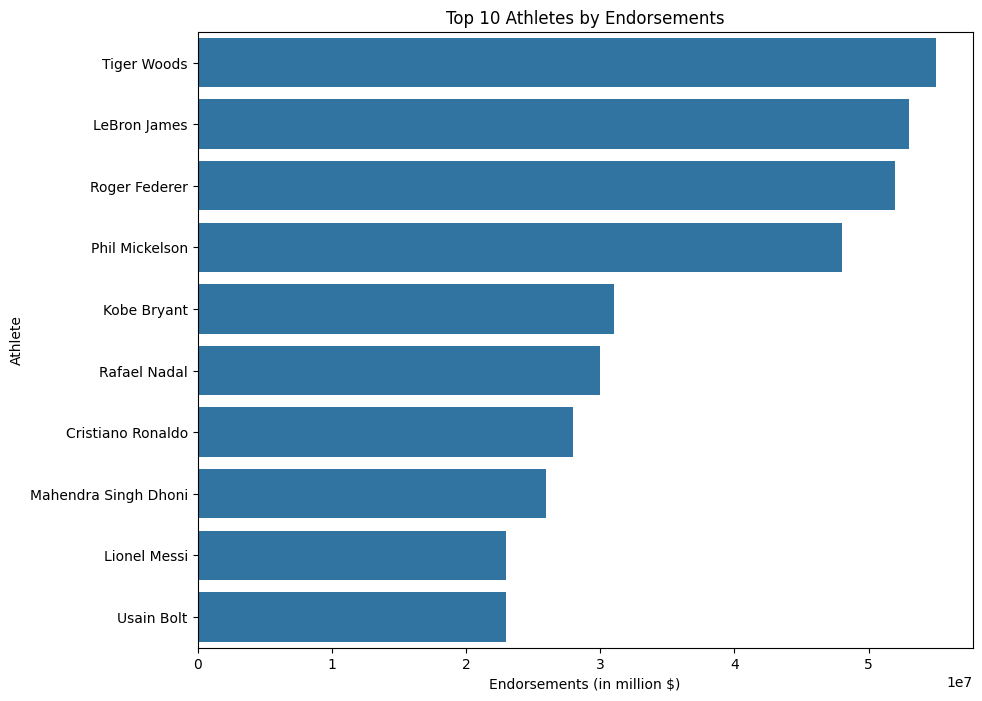

In [ ]:


# Hiển thị biểu đồ top 10 thu nhập từ các hợp đồng quảng cáo của các vận động viên
plt.figure(figsize=(10, 8))
sns.barplot(x='Endorsements', y='Athlete', data=top_athlete_salaries.sort_values('Endorsements', ascending=False).head(10))
plt.title('Top 10 Athletes by Endorsements')
plt.xlabel('Endorsements (in million $)')
plt.ylabel('Athlete')
plt.show()


Nhận Xét Chung:

Sự Khác Biệt Lớn Trong Thu Nhập Quảng Cáo:

 - Biểu đồ cho thấy sự khác biệt rõ rệt trong thu nhập từ các hợp đồng quảng cáo giữa các vận động viên hàng đầu. Những vận động viên đứng đầu danh sách có thu nhập từ quảng cáo cao hơn nhiều so với các vận động viên khác.
Sự Thống Trị của Các Biểu Tượng Thể Thao Toàn Cầu:

 - Các vận động viên đứng đầu danh sách chủ yếu là những biểu tượng thể thao toàn cầu như Roger Federer, Tiger Woods, và LeBron James. Điều này phản ánh mức độ phổ biến và sự hấp dẫn thương mại của họ trên toàn thế giới.
Ảnh Hưởng Của Thương Hiệu Cá Nhân:

 - Thu nhập từ quảng cáo của các vận động viên phản ánh không chỉ thành tích thi đấu mà còn thương hiệu cá nhân và khả năng tiếp thị của họ. Những vận động viên có hình ảnh cá nhân mạnh mẽ và tích cực thường thu hút nhiều hợp đồng quảng cáo hơn.

Phân Tích Cụ Thể:

Roger Federer:

 - Thu Nhập từ Quảng Cáo Cao Nhất: Roger Federer đứng đầu danh sách với thu nhập từ quảng cáo cao nhất.
 - Lý Do: Federer là một trong những tay vợt nổi tiếng nhất thế giới, với hình ảnh chuyên nghiệp, thân thiện và phong độ ổn định, thu hút nhiều hợp đồng quảng cáo từ các thương hiệu lớn như Rolex, Nike, và Wilson.
 - Ảnh Hưởng: Điều này cho thấy sức hút thương mại mạnh mẽ của Federer và tầm quan trọng của việc xây dựng và duy trì hình ảnh cá nhân tích cực trong suốt sự nghiệp.

Tiger Woods:

 - Xếp Hạng Thứ Hai: Tiger Woods có thu nhập từ quảng cáo cao, mặc dù đã trải qua nhiều thăng trầm trong sự nghiệp.
 - Lý Do: Woods vẫn duy trì sức hút thương mại mạnh mẽ và có nhiều hợp đồng quảng cáo với các thương hiệu lớn như Nike và Bridgestone.
 - Ảnh Hưởng: Điều này cho thấy tầm quan trọng của việc xây dựng thương hiệu cá nhân vững chắc, giúp duy trì thu nhập từ quảng cáo ngay cả khi không còn ở đỉnh cao sự nghiệp.

LeBron James:

 - Xếp Hạng Thứ Ba: LeBron James có thu nhập cao từ các hợp đồng quảng cáo.
 - Lý Do: James là một trong những cầu thủ bóng rổ hàng đầu NBA, nổi tiếng với thành tích thi đấu xuất sắc và các hoạt động xã hội. Anh có hợp đồng quảng cáo với các thương hiệu lớn như Nike, Coca-Cola, và Beats by Dre.
 - Ảnh Hưởng: James không chỉ là một vận động viên thành công mà còn là một biểu tượng thương hiệu, giúp anh có thu nhập đáng kể từ các hợp đồng quảng cáo.

Phil Mickelson:

 - Nằm Trong Top 5: Phil Mickelson có thu nhập từ quảng cáo cao, phần lớn đến từ các thương hiệu liên quan đến golf như Callaway, Barclays, và KPMG.
 - Lý Do: Mickelson là một trong những tay golf nổi tiếng nhất thế giới, với hình ảnh thân thiện và chuyên nghiệp.
 - Ảnh Hưởng: Sự kết hợp giữa thành công trong golf và hình ảnh thương hiệu giúp Mickelson duy trì thu nhập cao từ các hợp đồng quảng cáo.

Cristiano Ronaldo:

 - Nằm Trong Top 10: Cristiano Ronaldo có thu nhập từ quảng cáo cao, chủ yếu đến từ các hợp đồng quảng cáo với các thương hiệu quốc tế lớn như Nike, Clear Shampoo, và CR7.
 - Lý Do: Ronaldo là một trong những cầu thủ bóng đá nổi tiếng nhất thế giới, với lượng người hâm mộ đông đảo và sức hấp dẫn thương mại toàn cầu.
 - Ảnh Hưởng: Sự thành công trên sân cỏ và khả năng thương mại hóa hình ảnh cá nhân giúp Ronaldo duy trì thu nhập cao từ các hợp đồng quảng cáo.

Kết Luận:
 - Biểu đồ top 10 vận động viên có thu nhập từ quảng cáo cao nhất cung cấp cái nhìn chi tiết về sự chênh lệch thu nhập từ quảng cáo giữa các vận động viên hàng đầu. Thu nhập từ quảng cáo của các vận động viên không chỉ dựa vào thành tích thi đấu mà còn phản ánh sức hút thương mại của họ. Sự khác biệt trong mức thu nhập từ quảng cáo giữa các vận động viên cho thấy tầm quan trọng của việc xây dựng thương hiệu cá nhân và khả năng thương mại hóa hình ảnh cá nhân của từng vận động viên. Những vận động viên đứng đầu danh sách thường là những người có sức hút thương mại lớn và hình ảnh cá nhân mạnh mẽ

3.2.Top 10 Athletes by 2014 Pay bao gồm tổng thu nhập

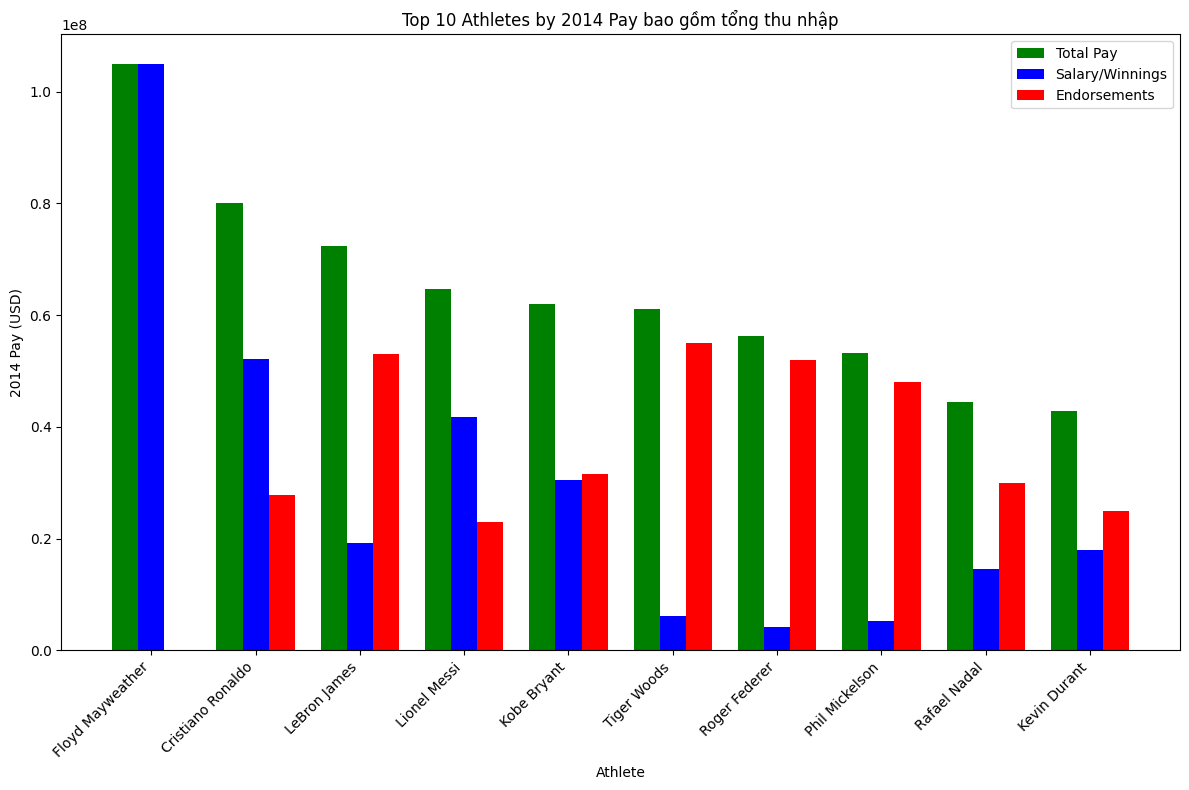

In [44]:
# Mẫu dữ liệu - thay thế bằng dữ liệu thực tế của bạn
data = {'Athlete': ['Floyd Mayweather', 'Cristiano Ronaldo', 'LeBron James', 'Lionel Messi', 'Kobe Bryant',
                    'Tiger Woods', 'Roger Federer', 'Phil Mickelson', 'Rafael Nadal', 'Kevin Durant'],
        '2014 Pay': ['$105,000,000', '$80,000,000', '$72,300,000', '$64,700,000', '$62,000,000',
                     '$61,200,000', '$56,200,000', '$53,200,000', '$44,500,000', '$42,900,000'],
        'Salary/Winnings': ['$105,000,000', '$52,200,000', '$19,300,000', '$41,700,000', '$30,500,000',
                            '$6,200,000', '$4,200,000', '$5,200,000', '$14,500,000', '$17,900,000'],
        'Endorsements': ['$0', '$27,800,000', '$53,000,000', '$23,000,000', '$31,500,000',
                         '$55,000,000', '$52,000,000', '$48,000,000', '$30,000,000', '$25,000,000']}

# Tạo DataFrame
athlete_salaries_df = pd.DataFrame(data)

# Chuyển đổi các cột tiền lương của vận động viên sang định dạng số
athlete_salaries_df['2014 Pay'] = athlete_salaries_df['2014 Pay'].replace('[\$,]', '', regex=True).astype(float)
athlete_salaries_df['Salary/Winnings'] = athlete_salaries_df['Salary/Winnings'].replace('[\$,]', '', regex=True).astype(float)
athlete_salaries_df['Endorsements'] = athlete_salaries_df['Endorsements'].replace('[\$,]', '', regex=True).astype(float)

# Chọn 10 vận động viên hàng đầu
top_athletes = athlete_salaries_df.head(10)

# Tạo biểu đồ thanh
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(top_athletes))

bar1 = ax.bar(index, top_athletes['2014 Pay'], bar_width, label='Total Pay', color='green')
bar2 = ax.bar([i + bar_width for i in index], top_athletes['Salary/Winnings'], bar_width, label='Salary/Winnings', color='blue')
bar3 = ax.bar([i + 2 * bar_width for i in index], top_athletes['Endorsements'], bar_width, label='Endorsements', color='red')

ax.set_xlabel('Athlete')
ax.set_ylabel('2014 Pay (USD)')
ax.set_title('Top 10 Athletes by 2014 Pay bao gồm tổng thu nhập')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(top_athletes['Athlete'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

Nhận xét chung:

 - Biểu đồ thanh so sánh thu nhập của 10 vận động viên hàng đầu vào năm 2014 cung cấp cái nhìn rõ ràng về cấu trúc thu nhập của họ, bao gồm tổng thu nhập, tiền lương/thắng, và tiền từ các hợp đồng tài trợ. Các dữ liệu này phản ánh sự đa dạng trong nguồn thu nhập của các vận động viên và sự khác biệt đáng kể giữa các môn thể thao và vận động viên.

Phân tích cụ thể:

Floyd Mayweather:

 - Tổng thu nhập: 105 triệu USD
 - Tiền lương/thắng: 105 triệu USD
 - Hợp đồng tài trợ: 0 USD
 - Phân tích: Floyd Mayweather dẫn đầu danh sách với tổng thu nhập chủ yếu đến từ tiền lương và tiền thắng, không có thu nhập từ hợp đồng tài trợ. Điều này cho thấy sức mạnh của Mayweather trong môn boxing, nơi tiền thắng các trận đấu đóng vai trò chính trong thu nhập của anh.

Cristiano Ronaldo:

 - Tổng thu nhập: 80 triệu USD
 - Tiền lương/thắng: 52,2 triệu USD
 - Hợp đồng tài trợ: 27,8 triệu USD
 - Phân tích: Cristiano Ronaldo có thu nhập cao thứ hai với phần lớn đến từ tiền lương và hợp đồng tài trợ. Điều này phản ánh tầm ảnh hưởng toàn cầu và giá trị thương mại của Ronaldo trong làng bóng đá.

LeBron James:

 - Tổng thu nhập: 72,3 triệu USD
 - Tiền lương/thắng: 19,3 triệu USD
 - Hợp đồng tài trợ: 53 triệu USD
 - Phân tích: LeBron James có nguồn thu nhập đa dạng, với phần lớn đến từ hợp đồng tài trợ. Điều này cho thấy tầm ảnh hưởng của anh trong làng bóng rổ và giá trị thương mại từ các hợp đồng quảng cáo và hợp tác.

Lionel Messi:

 - Tổng thu nhập: 64,7 triệu USD
 - Tiền lương/thắng: 41,7 triệu USD
 - Hợp đồng tài trợ: 23 triệu USD
 - Phân tích: Lionel Messi có thu nhập cao từ cả tiền lương và hợp đồng tài trợ, cho thấy sự thành công và tầm ảnh hưởng của anh trong bóng đá.

Kết luận:
 - Biểu đồ và phân tích cho thấy rằng thu nhập của các vận động viên hàng đầu không chỉ phụ thuộc vào tiền lương từ các trận đấu mà còn rất lớn từ các hợp đồng tài trợ. Điều này phản ánh sự quan trọng của thương hiệu cá nhân và giá trị thương mại trong thể thao hiện đại. Sự đa dạng trong nguồn thu nhập cũng cho thấy sự phát triển và chuyên nghiệp hóa của các vận động viên trong việc khai thác giá trị thương mại từ sự nổi tiếng và thành công của họ.








**4.Kết quả và thảo luận**

   4.1.Các nguyên tắc:

4.1.1. Tính nhất quán:

 - Bố cục bảng: Giữ bố cục của các bảng thống nhất với các tiêu đề cột rõ ràng và định dạng đồng nhất. Điều này giúp người đọc dễ dàng so sánh thông tin giữa các hàng và cột.
 - Đơn vị đo lường: Sử dụng cùng một đơn vị đo lường cho các giá trị tài chính (ví dụ: triệu USD) để người đọc dễ dàng theo dõi và so sánh.

4.1.2. Tính đơn giản:
 - Tránh quá tải thông tin: Chỉ trình bày những thông tin cần thiết, không làm bảng quá phức tạp với nhiều dữ liệu không cần thiết. Ví dụ, chỉ hiển thị vài dòng đầu tiên của bảng dữ liệu để cung cấp cái nhìn tổng quan.
 - Ngôn ngữ rõ ràng: Sử dụng ngôn ngữ đơn giản và dễ hiểu để mô tả các cột và hàng trong bảng.

4.1.3. Sử dụng màu sắc hợp lý
 - Nhấn mạnh thông tin quan trọng: Mặc dù không sử dụng màu sắc trong phân tích văn bản, nguyên tắc này nhấn mạnh việc sử dụng màu sắc để làm nổi bật các giá trị quan trọng hoặc sự thay đổi đáng kể trong dữ liệu khi thực hiện trên đồ thị hoặc bảng biểu thực tế.

4.1.4. Tính tương phản:
 - Định dạng bảng rõ ràng: Đảm bảo rằng văn bản và các giá trị trong bảng có đủ độ tương phản để dễ đọc. Sử dụng định dạng đậm cho tiêu đề cột để làm rõ ràng và dễ theo dõi.

4.1.5. Sắp xếp và phân loại dữ liệu:

 - Xếp hạng và thứ tự: Các đội và vận động viên được sắp xếp theo thứ tự xếp hạng, giúp người đọc dễ dàng nhận thấy ai đang đứng đầu và sự thay đổi trong xếp hạng.

4.1.6. Ngữ cảnh và so sánh:
 - So sánh năm trước: Bao gồm thông tin so sánh với năm trước để người đọc có thể thấy xu hướng thay đổi.
 - Phần trăm thay đổi: Cung cấp tỷ lệ phần trăm thay đổi giúp dễ dàng hiểu được mức độ thay đổi theo thời gian.

4.1.7. Tính chính xác:
 - Trình bày số liệu chính xác: Đảm bảo rằng tất cả các số liệu được trình bày một cách chính xác và nhất quán để tránh hiểu lầm.
 - Lý do chọn lựa:

  Dễ dàng hiểu và theo dõi: Các nguyên tắc này giúp người đọc nhanh chóng hiểu được thông tin quan trọng mà không bị lẫn lộn bởi quá nhiều chi tiết không cần thiết.

  Tăng tính tin cậy: Trình bày dữ liệu một cách rõ ràng và nhất quán giúp tăng cường độ tin cậy của thông tin.

  Hỗ trợ ra quyết định: Thông tin được trình bày rõ ràng giúp người đọc dễ dàng đưa ra các quyết định dựa trên dữ liệu.

4.2. Mô tả Kết quả

4.2.1. Biểu đồ so sánh quỹ lương trung bình hàng năm của các đội
Biểu đồ thanh này so sánh mức lương trung bình hàng năm của cầu thủ cho 10 đội hàng đầu từ bảng "Top teams Payroll List". Các đội bóng được liệt kê bao gồm Manchester City, New York Yankees, Los Angeles Dodgers, Real Madrid, và Barcelona. Trục x hiển thị tên đội và giải đấu, trục y hiển thị mức lương trung bình hàng năm (USD).

4.2.2. Biểu đồ so sánh thu nhập của các vận động viên hàng đầu:

 - Biểu đồ thanh này so sánh tổng thu nhập, tiền lương/thắng và tiền từ các hợp đồng tài trợ của 10 vận động viên hàng đầu từ bảng "Top Athlete Salaries". Các vận động viên bao gồm Floyd Mayweather, Cristiano Ronaldo, LeBron James, Lionel Messi, và Kobe Bryant. Trục x hiển thị tên vận động viên, trục y hiển thị thu nhập năm 2014 (USD). Biểu đồ sử dụng ba màu khác nhau để phân biệt giữa tổng thu nhập, tiền lương/thắng và tiền từ các hợp đồng tài trợ.

4.3. Thảo luận về Ý nghĩa và Thông tin quan trọng:

4.3.1. Biểu đồ quỹ lương trung bình hàng năm của các đội
 - Manchester City đứng đầu: Đội bóng này có mức lương trung bình hàng năm cao nhất cho mỗi cầu thủ, phản ánh việc đầu tư mạnh vào nhân sự để cạnh tranh tại giải đấu EPL.
 - Chênh lệch giữa các đội: Có sự khác biệt rõ rệt về mức lương giữa các đội bóng, với một số đội bóng như Real Madrid và Barcelona cũng có mức lương cao nhưng vẫn thấp hơn Manchester City.
 - Tăng trưởng quỹ lương: Phần trăm thay đổi từ năm trước và trong 5 năm cho thấy một số đội có sự tăng trưởng mạnh về quỹ lương, cho thấy sự đầu tư liên tục vào việc chi trả cho cầu thủ.

4.3.2. Biểu đồ thu nhập của các vận động viên hàng đầu:

 - Floyd Mayweather dẫn đầu: Với tổng thu nhập cao nhất, phần lớn đến từ tiền lương/thắng, điều này nhấn mạnh sự thành công và khả năng thương mại hóa của anh trong môn boxing.
 - Sức mạnh của hợp đồng tài trợ: Các vận động viên như LeBron James và Cristiano Ronaldo có thu nhập lớn từ các hợp đồng tài trợ, cho thấy tầm quan trọng của thương hiệu cá nhân trong việc tăng thu nhập.
 - Sự chênh lệch giữa các môn thể thao: Các vận động viên từ các môn thể thao khác nhau (boxing, soccer, basketball) đều có mức thu nhập cao, nhưng cấu trúc thu nhập có thể khác nhau (ví dụ: một số có phần lớn thu nhập từ lương, một số khác từ tài trợ).

Kết luận:

 - Các biểu đồ và phân tích dữ liệu đã cung cấp một cái nhìn rõ ràng và trực quan về quỹ lương của các đội bóng hàng đầu và thu nhập của các vận động viên hàng đầu. Những thông tin này không chỉ giúp hiểu rõ hơn về sự đầu tư và chi trả trong thể thao mà còn phản ánh xu hướng và chiến lược tài chính của các đội bóng và vận động viên.